In [10]:
%load_ext autoreload
%autoreload 2

import os
os.environ["DATA_PATH"] = "../assets/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import torch
import torch.optim as optim
import numpy as np

import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from src.game.wrapped_flappy_bird import GameState
from src.models.DoubleDQN import DoubleDQN, QualityEstimator, policy

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
config = {
    "sessions_num": 1000,
    "gamma": 1.001,
    "lr": 1e-3,
    "state_dim": 7,
    "action_dim": 2,
    "hid_dim": [30, 30, 30, 16],
    "epsion": 1e-2,
    "temperature": 1
}

GAMMA = config["gamma"]
EPS = config["epsion"]
TEMP = config["temperature"]
SESSIONS_NUM = config["sessions_num"]

In [13]:
action_terminal = GameState()

model = QualityEstimator(
    config["state_dim"],
    config["action_dim"],
    config["hid_dim"]
)

optimizer = optim.Adam(model.parameters())

In [14]:
total_rewards = []

for session_idx in tqdm(range(SESSIONS_NUM)):
    
    terminal = False
    input_action = 0
    _, reward, terminal = action_terminal.frame_step(input_action)
    state = torch.tensor(list(action_terminal.state.values()), dtype=torch.float32)
    total_reward = 0.0
    while not terminal:
        model.zero_grad()
        
        predicted_actions_rewards = model(state)
        
        action, predicted_reward = policy(model, state, TEMP)
        _, reward, terminal = action_terminal.frame_step(action)
        state = torch.tensor(list(action_terminal.state.values()), dtype=torch.float32)
        with torch.no_grad():
            max_next_reward = torch.max(model(state))
        loss = (predicted_reward - (reward + GAMMA * max_next_reward)).pow(2)
        loss.backward()
        
        optimizer.step()
        total_reward += reward
        
    
    total_rewards += [total_reward]    

  0%|          | 0/1000 [00:00<?, ?it/s]

[0.49476248 0.5052375 ]
[0.5164947  0.48350537]
[0.5335882  0.46641186]
[0.5311645  0.46883547]
[0.5284222  0.47157785]
[0.5210384  0.47896156]
[0.5111747  0.48882523]
[0.50311637 0.4968836 ]
[0.4964199 0.5035801]
[0.49377367 0.5062263 ]
[0.4918794  0.50812054]
[0.4907398  0.50926024]
[0.49294356 0.50705653]
[0.4946846 0.5053154]
[0.49562842 0.50437164]
[0.49592707 0.50407296]
[0.49454403 0.505456  ]
[0.49312598 0.5068741 ]
[0.4915791  0.50842094]
[0.49259415 0.50740576]
[0.4952131 0.5047869]
[0.4988264 0.5011736]
[0.5020008  0.49799925]
[0.5026842  0.49731573]
[0.5033396  0.49666044]
[0.50265557 0.4973444 ]
[0.5008585  0.49914157]
[0.49950504 0.5004949 ]
[0.497337   0.50266296]
[0.49609113 0.50390893]
[0.4957553 0.5042446]
[0.49623945 0.5037606 ]
[0.49753127 0.5024688 ]
[0.49919945 0.50080055]
[0.5010547  0.49894527]
[0.50239104 0.497609  ]
[0.5026804  0.49731964]
[0.50191665 0.49808335]
[0.5002579  0.49974212]
[0.49828553 0.50171447]
[0.49641433 0.5035857 ]
[0.495575 0.504425]
[0.495

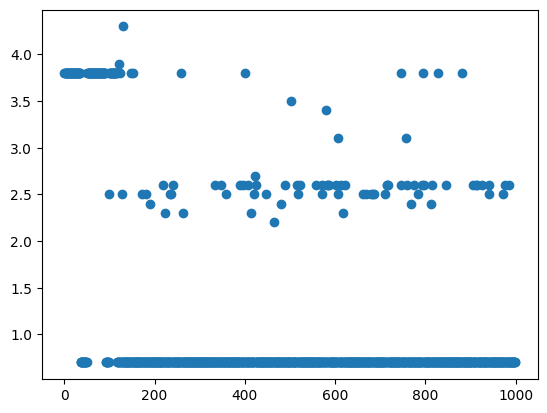

In [15]:
plt.scatter(range(len(total_rewards)), total_rewards)